<a href="https://colab.research.google.com/github/rynwhd/Language-Models/blob/main/CNN_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D, Conv1D, MaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [19]:
df=pd.read_csv('bbc_text_cls.csv')

In [20]:
df['targets']=df['labels'].astype('category').cat.codes

In [21]:
K=df['targets'].max()+1

In [22]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [23]:
MAX_VOCAB_SIZE=2000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train=tokenizer.texts_to_sequences(df_train['text'])
sequences_test=tokenizer.texts_to_sequences(df_test['text'])

In [34]:
word2idx=tokenizer.word_index
V=len(word2idx)

In [25]:
data_train=pad_sequences(sequences_train)

In [26]:
data_train.shape

(1557, 3486)

In [27]:
data_train

array([[   0,    0,    0, ..., 1113,    2,  192],
       [   0,    0,    0, ...,  440,  630, 1114],
       [   0,    0,    0, ...,   73,   73,  232],
       ...,
       [   0,    0,    0, ...,    1,  381,    3],
       [   0,    0,    0, ...,   20,   11,   30],
       [   0,    0,    0, ...,    1,  564,  237]], dtype=int32)

In [28]:
T=data_train.shape[1]

In [29]:
data_test=pad_sequences(sequences_test,maxlen=T)

In [31]:
data_test.shape

(668, 3486)

In [35]:
D=50
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(K)(x)

In [36]:
model=Model(i,x)

In [37]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
r=model.fit(
    data_train,
    df_train['targets'],
    epochs=50,
    validation_data=(data_test,df_test['targets'])
)

Epoch 1/50
49/49 [==============================] - 13s 249ms/step - loss: 1.5659 - accuracy: 0.3661 - val_loss: 1.5035 - val_accuracy: 0.5269
Epoch 2/50
49/49 [==============================] - 11s 216ms/step - loss: 1.3442 - accuracy: 0.7097 - val_loss: 1.1994 - val_accuracy: 0.7485
Epoch 3/50
49/49 [==============================] - 10s 213ms/step - loss: 0.9027 - accuracy: 0.8741 - val_loss: 0.7461 - val_accuracy: 0.8368
Epoch 4/50
49/49 [==============================] - 12s 239ms/step - loss: 0.4848 - accuracy: 0.9268 - val_loss: 0.4646 - val_accuracy: 0.8922
Epoch 5/50
49/49 [==============================] - 11s 228ms/step - loss: 0.2757 - accuracy: 0.9518 - val_loss: 0.3390 - val_accuracy: 0.9087
Epoch 6/50
49/49 [==============================] - 12s 252ms/step - loss: 0.1761 - accuracy: 0.9685 - val_loss: 0.2736 - val_accuracy: 0.9251
Epoch 7/50
49/49 [==============================] - 11s 230ms/step - loss: 0.1204 - accuracy: 0.9827 - val_loss: 0.2391 - val_accuracy: 0.9326

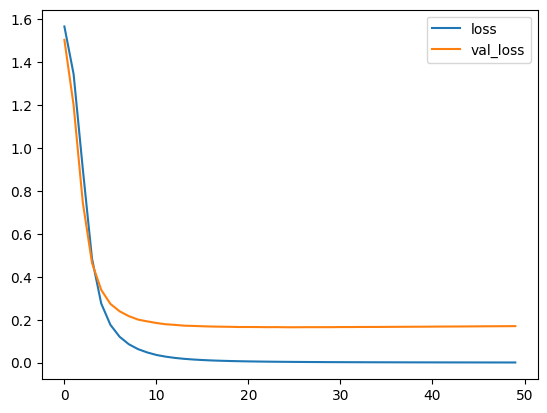

In [39]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

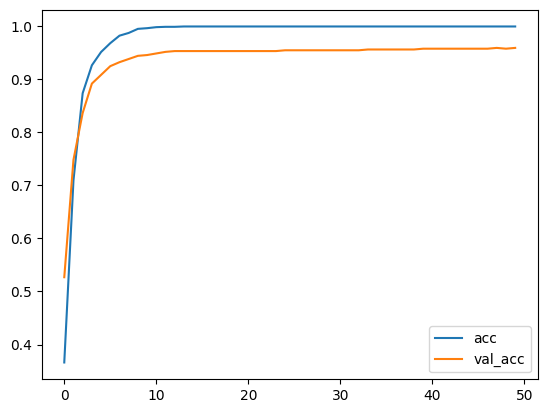

In [40]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()